## CREDID CARD FRAUD DETECTION 

#### DATA CLEANING AND PREPARATION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\rajashree\Downloads\creditcard.csv\creditcard.csv")
pd.DataFrame(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
transaction_counts = df['Class'].value_counts()
print("Number of legitimate transactions:", transaction_counts[0])
print("Number of fraudulent transactions:", transaction_counts[1])

Number of legitimate transactions: 284315
Number of fraudulent transactions: 492


In [23]:
total_transactions = len(df)
transaction_counts = df['Class'].value_counts()
fraudulent_transactions = transaction_counts[1]
non_fraudulent_transactions = transaction_counts[0]
percentage_fraudulent = (fraudulent_transactions / total_transactions) * 100
print(f"Percentage of fraudulent transactions: {percentage_fraudulent:.2f}%")
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [non_fraudulent_transactions, fraudulent_transactions]
colors = ['blue', 'red']
explode = (0.1, 0) 

Percentage of fraudulent transactions: 0.17%


In [22]:
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()


print(f"Minimum amount: {min_amount:.2f}")
print(f"Maximum amount: {max_amount:.2f}")
print(f"Mean amount: {mean_amount:.2f}")
print(f"Median amount: {median_amount:.2f}")

Minimum amount: 0.00
Maximum amount: 25691.16
Mean amount: 88.35
Median amount: 22.00


In [18]:
stats = ['Minimum', 'Maximum', 'Mean', 'Median']
values = [min_amount, max_amount, mean_amount, median_amount]

In [19]:
max_amount = df['Amount'].max()
max_amount_row = df[df['Amount'] == max_amount]
is_fraudulent = max_amount_row['Class'].values[0]
print(f"The maximum transaction amount is {max_amount}, and it is {'fraudulent' if is_fraudulent else 'legitimate'}.")

The maximum transaction amount is 25691.16, and it is legitimate.


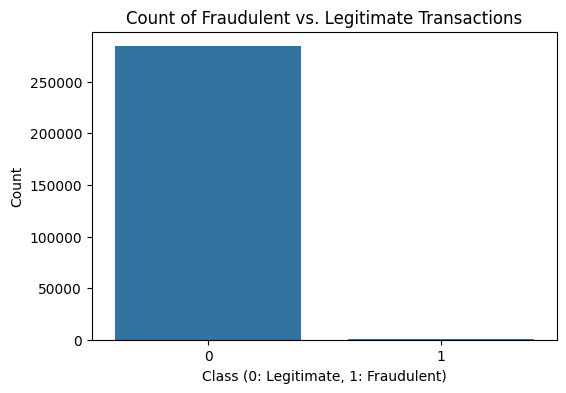

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

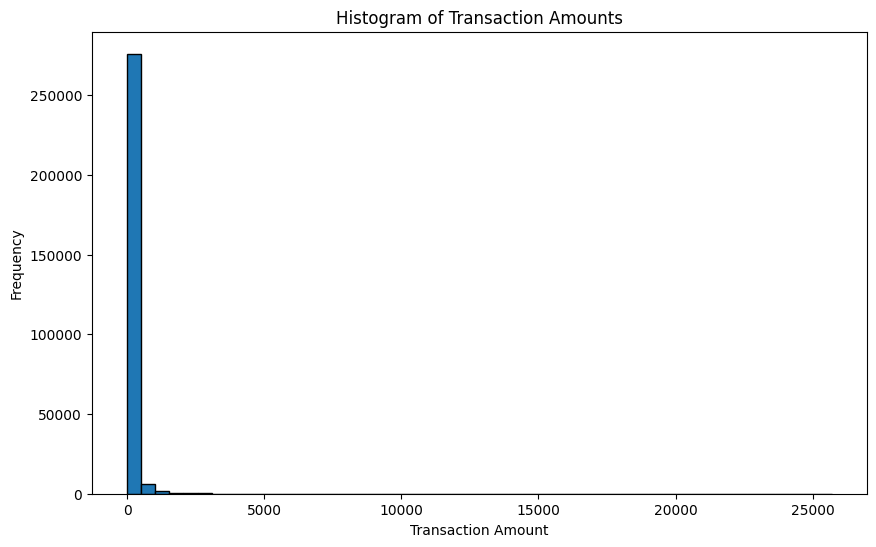

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

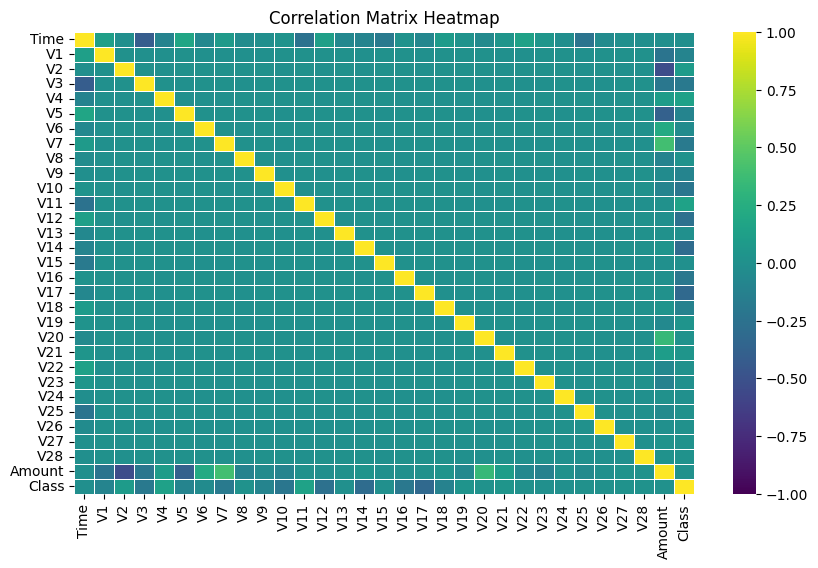

In [30]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap="viridis",vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Scatter Plot to Visualize Potential Outliers in Amount vs Time

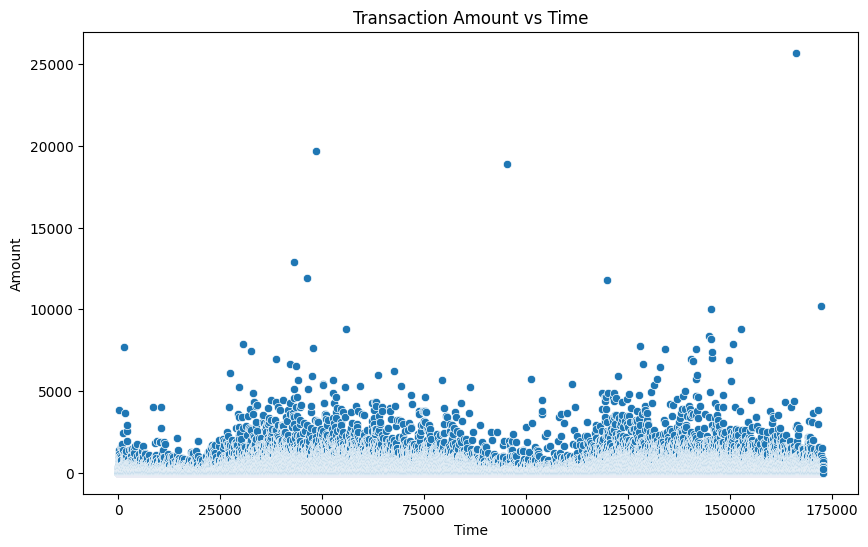

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=df)
plt.title('Transaction Amount vs Time')
plt.show()

#### Ensuring No Infinite Values and Visualizing Time Distribution for Fraud and Not Fraud Transactions¶

C:\Users\rajashree\AppData\Local\Temp\ipykernel_9164\454647970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)


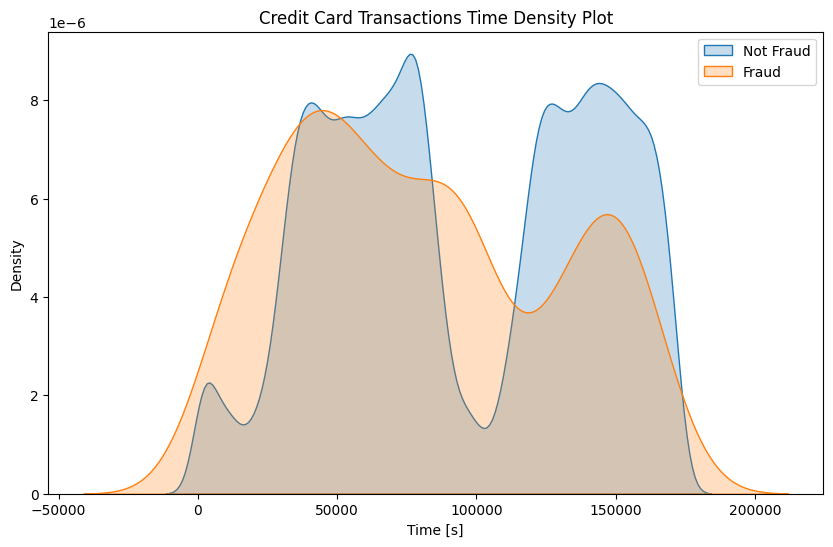

In [32]:
df['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True, common_norm=False)
sns.kdeplot(class_1, label='Fraud', fill=True, common_norm=False)
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Insights from the Analysis of Fraudulent Transactions by Hour

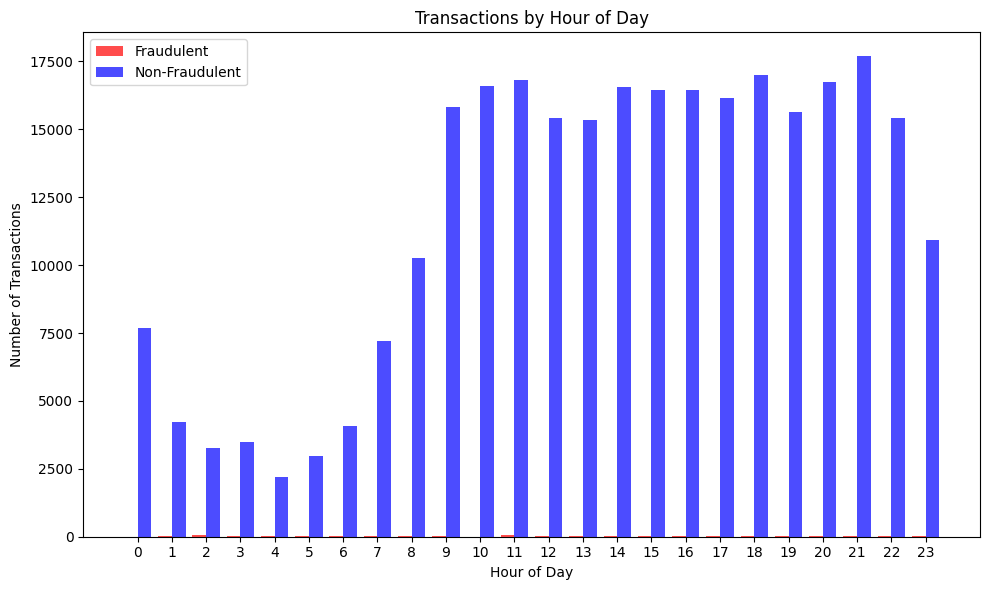

In [33]:
df['transaction_hour'] = (df['Time'] // 3600) % 24
df['is_fraudulent'] = df['Class']
fraudulent_df = df[df['is_fraudulent'] == 1]
non_fraudulent_df = df[df['is_fraudulent'] == 0]
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()
non_fraudulent_by_hour = non_fraudulent_df.groupby('transaction_hour').size()
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index - 0.2, fraudulent_by_hour.values, width=0.4, color='red', alpha=0.7, label='Fraudulent')
plt.bar(non_fraudulent_by_hour.index + 0.2, non_fraudulent_by_hour.values, width=0.4, color='blue', alpha=0.7, label='Non-Fraudulent')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Hour of Day')
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()

The hour with the most frequent fraudulent transactions is: 2.0:00
Number of fraudulent transactions during this hour: 57


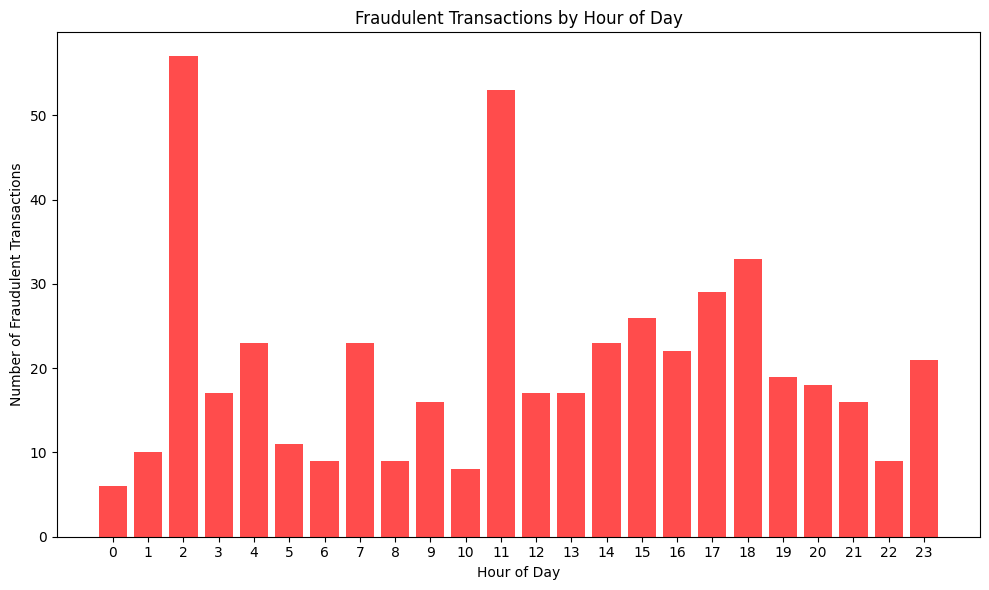

In [39]:
df['transaction_hour'] = (df['Time'] // 3600) % 24
df['is_fraudulent'] = df['Class']
fraudulent_df = df[df['is_fraudulent'] == 1]
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()
most_frequent_hour = fraudulent_by_hour.idxmax()
most_frequent_count = fraudulent_by_hour.max()
print(f"The hour with the most frequent fraudulent transactions is: {most_frequent_hour}:00")
print(f"Number of fraudulent transactions during this hour: {most_frequent_count}")
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index, fraudulent_by_hour.values, color='red', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.tight_layout()
plt.show()

#### Data Preprocessing and Calculation of Hourly Statistics

In [42]:
df['transaction_hour'] = (df['Time'] // 3600) % 24
df.replace([np.inf, -np.inf], np.nan, inplace=True)
hourly_stats = df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
hourly_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']
fraudulent_df = df[df['Class'] == 1]
non_fraudulent_df = df[df['Class'] == 0]
fraudulent_stats = fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']
non_fraudulent_stats = non_fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
non_fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

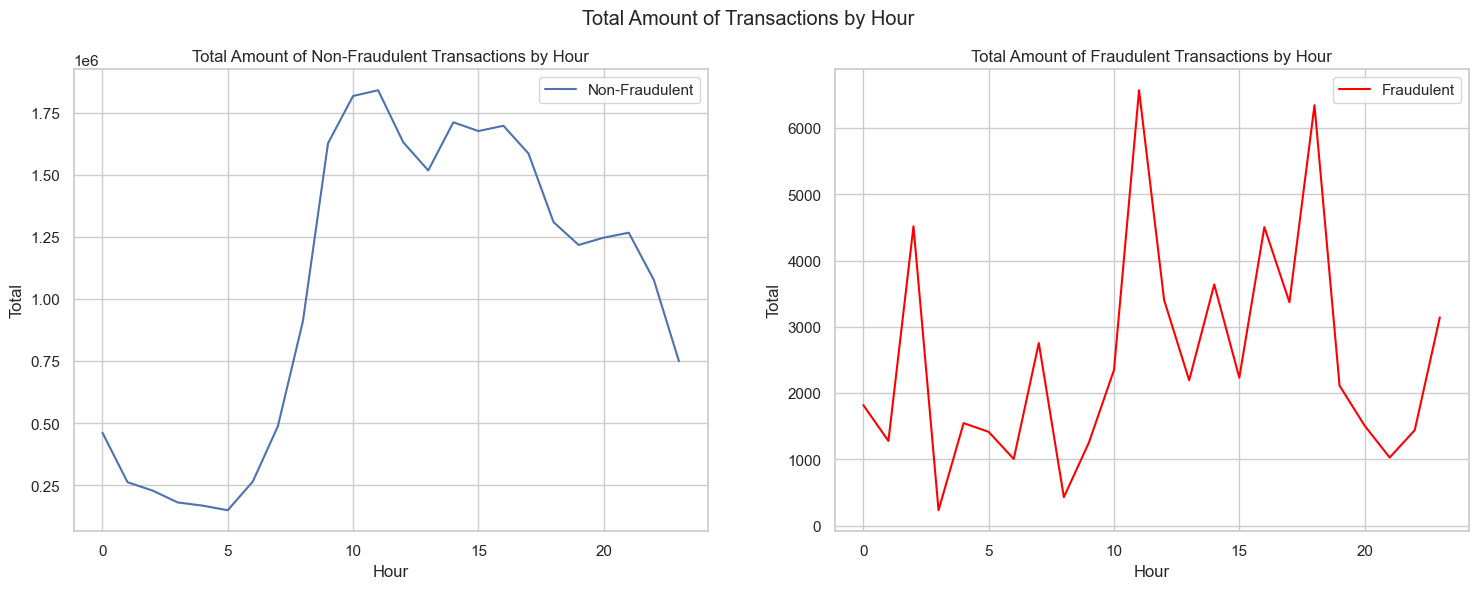

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Total', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Total', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Total Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Total Amount of Fraudulent Transactions by Hour')
plt.suptitle('Total Amount of Transactions by Hour')
plt.show()


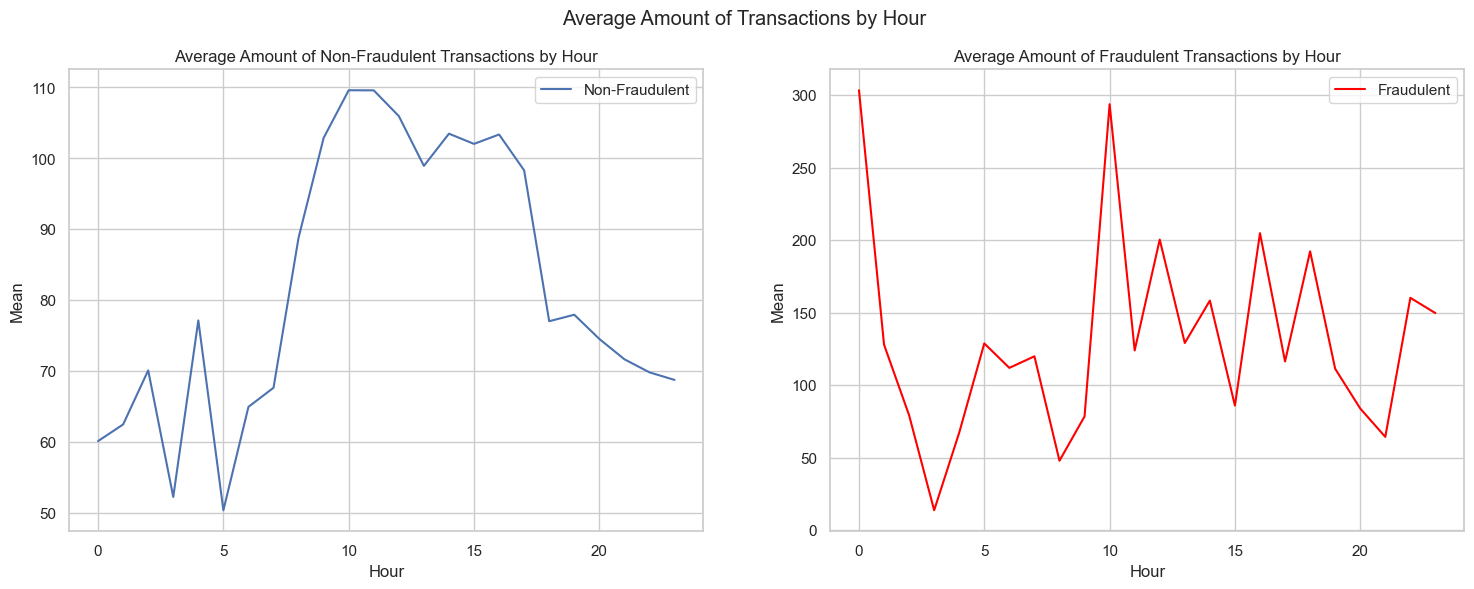

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Mean', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Mean', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Average Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Average Amount of Fraudulent Transactions by Hour')
plt.suptitle('Average Amount of Transactions by Hour')
plt.show()


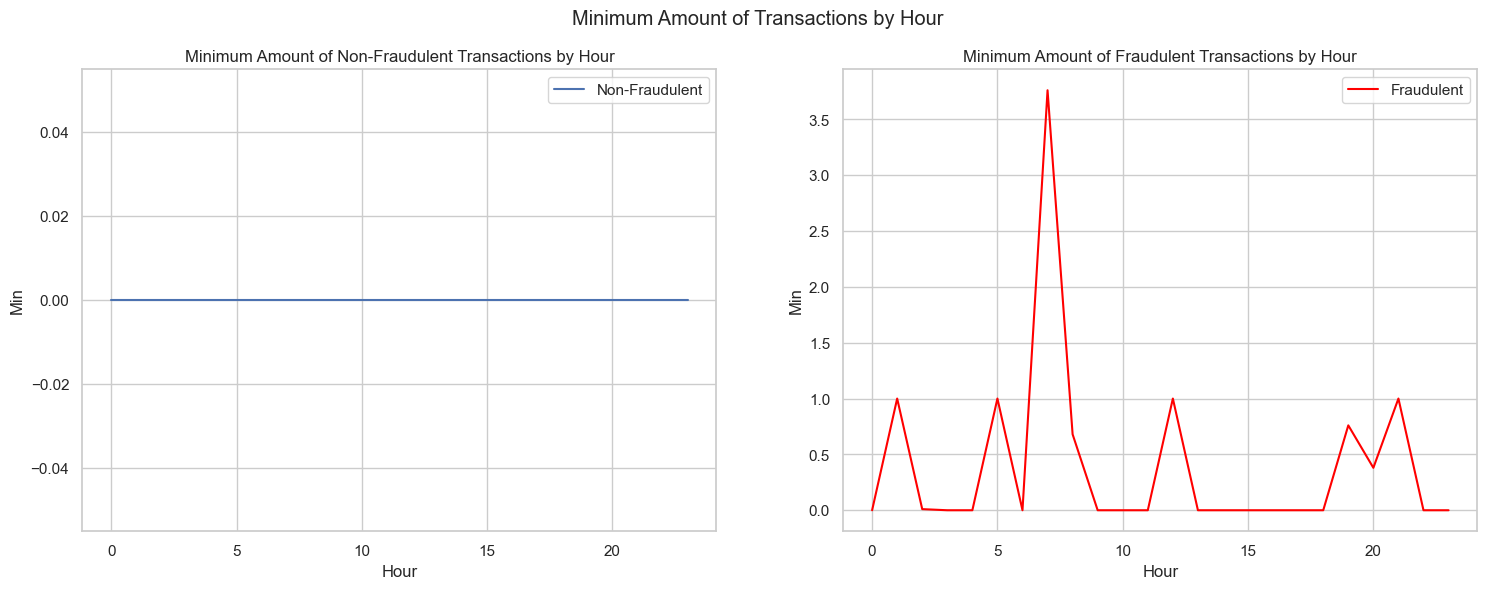

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Min', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Min', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Minimum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Minimum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Minimum Amount of Transactions by Hour')
plt.show()


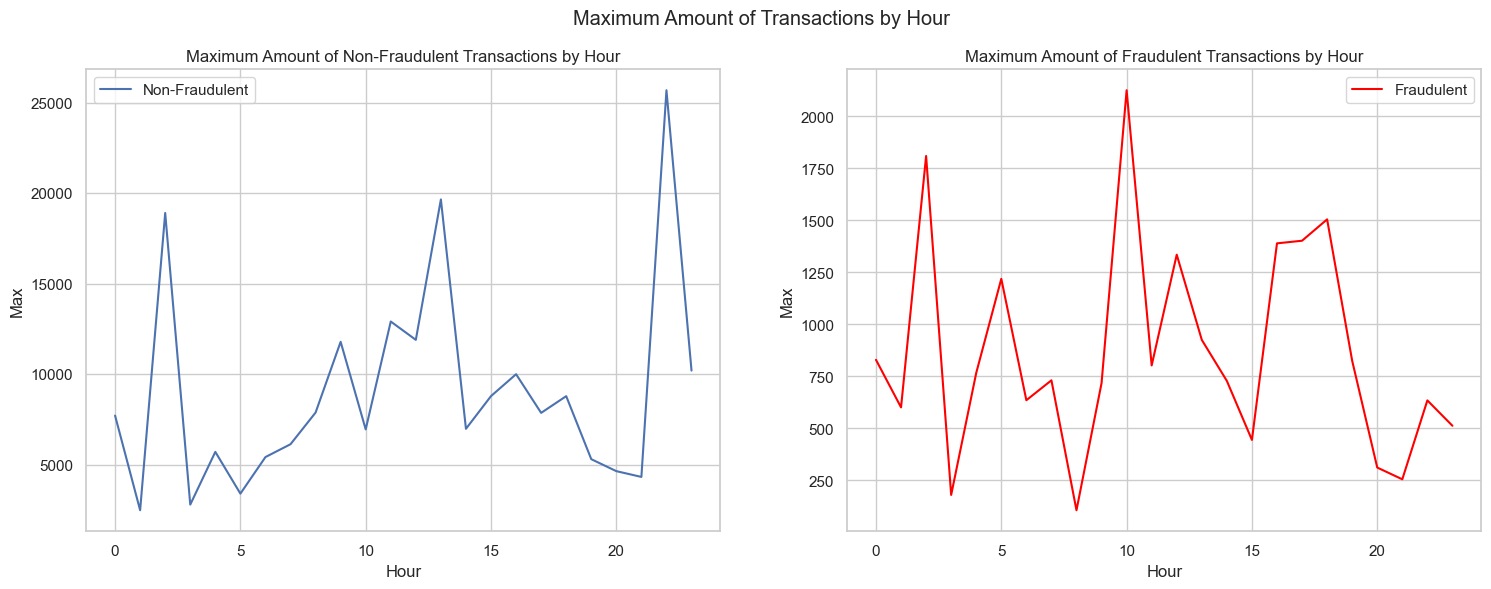

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Max', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Max', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Maximum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Maximum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Maximum Amount of Transactions by Hour')
plt.show()


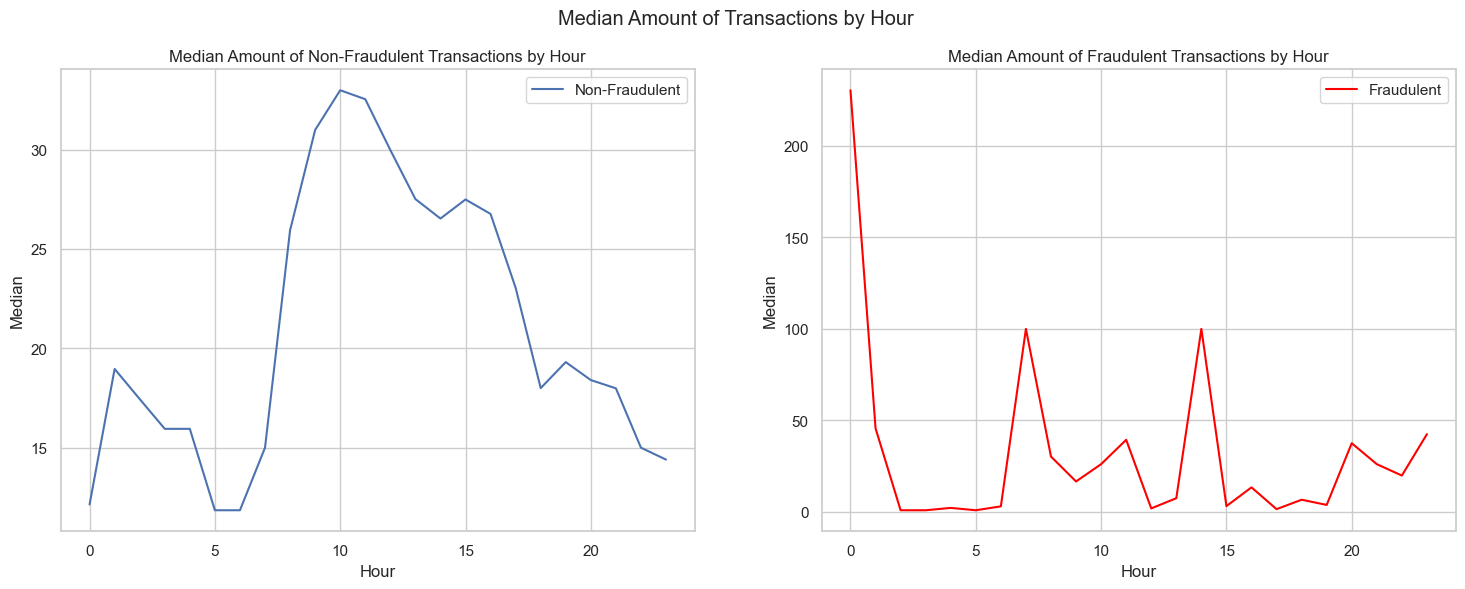

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Median', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Median', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Median Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Median Amount of Fraudulent Transactions by Hour')
plt.suptitle('Median Amount of Transactions by Hour')
plt.show()

#### Box Plots to Visualize Transaction Amounts for Fraudulent and Non-Fraudulent Transactions

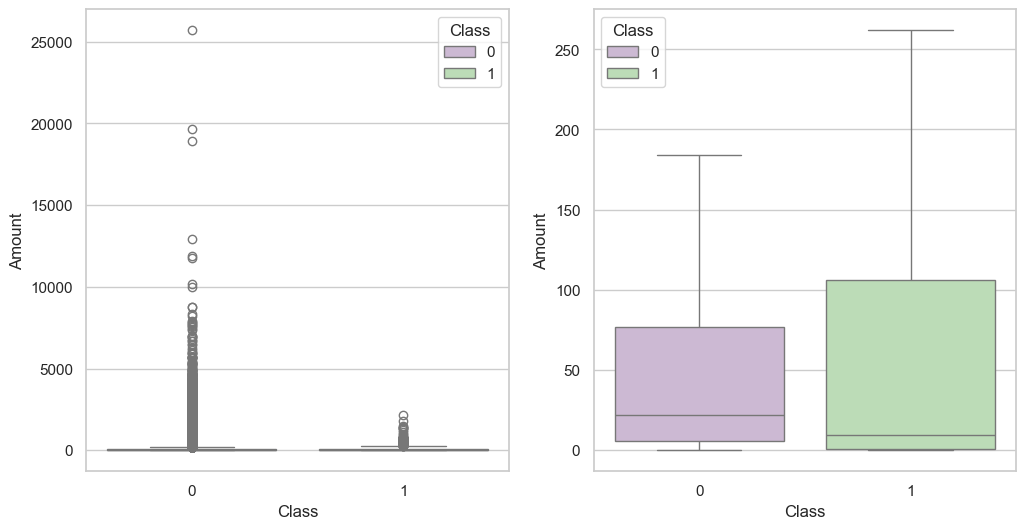

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show()

In [49]:
tmp = df[['Amount', 'Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
print("Non-Fraudulent Transactions:")
print(class_0.describe())
print("\nFraudulent Transactions:")
print(class_1.describe())

Non-Fraudulent Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


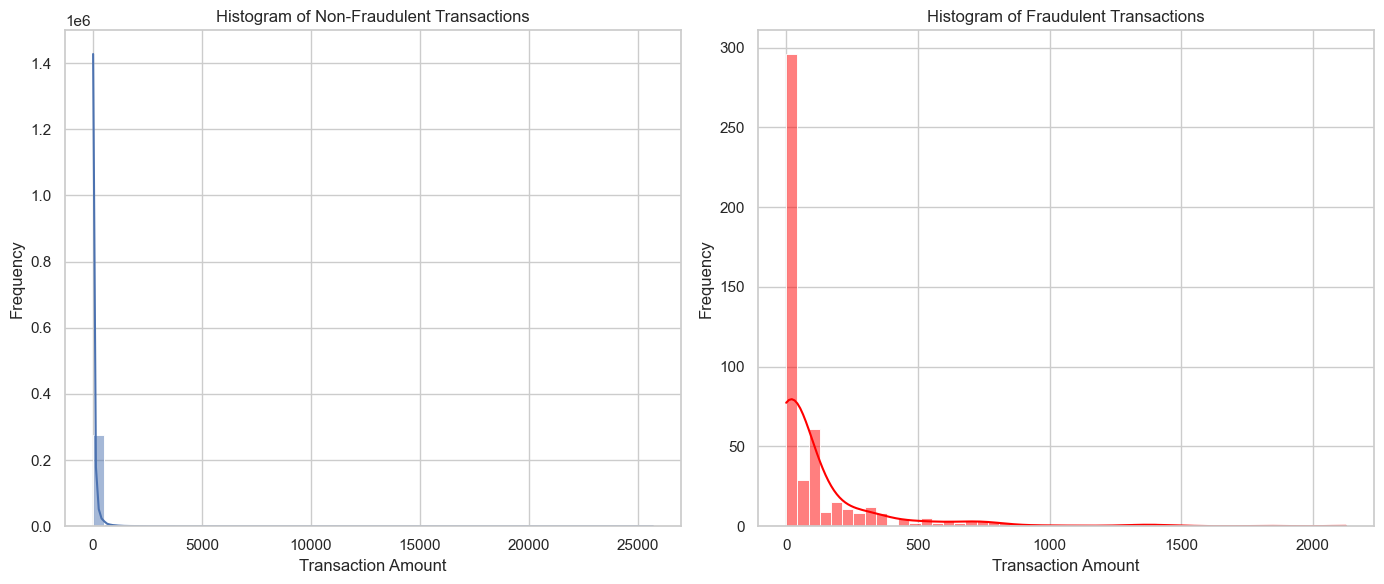

In [50]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(class_0, bins=50, kde=True)
plt.title('Histogram of Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(class_1, bins=50, kde=True, color='red')
plt.title('Histogram of Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

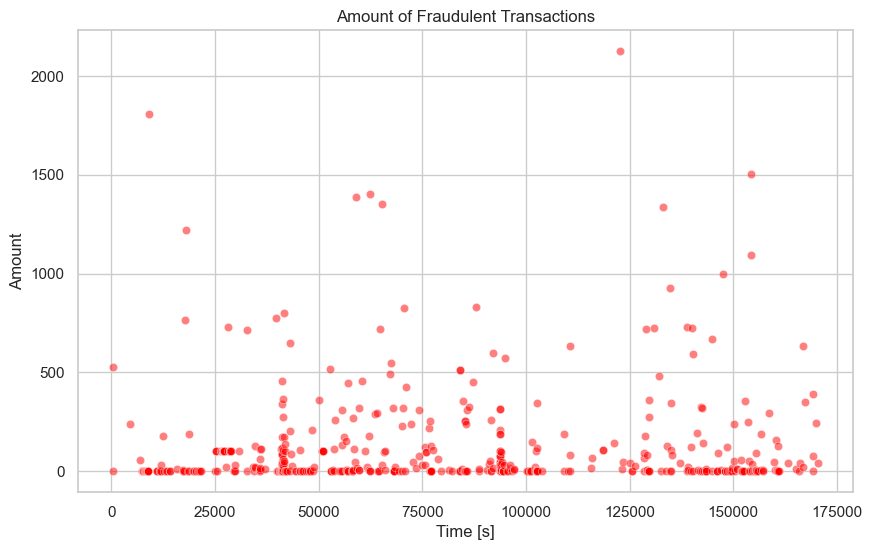

In [51]:
fraud = df.loc[df['Class'] == 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=fraud['Time'], 
    y=fraud['Amount'], 
    color='red', 
    alpha=0.5)
plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')
plt.show()

Text(0, 0.5, 'Amount')

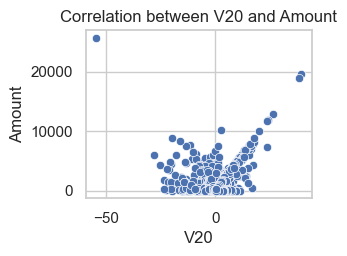

In [58]:
sns.set(style="whitegrid")
plt.subplot(2, 2, 2)
sns.scatterplot(x='V20', y='Amount', data=df)
plt.title('Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')


Text(0, 0.5, 'Amount')

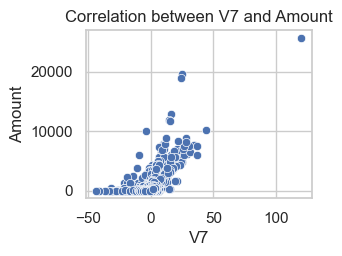

In [53]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='V7', y='Amount', data=df)
plt.title('Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')


Text(0, 0.5, 'Amount')

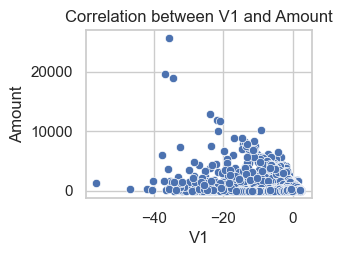

In [57]:
plt.subplot(2, 2, 3)
sns.scatterplot(x='V1', y='Amount', data=df)
plt.title('Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

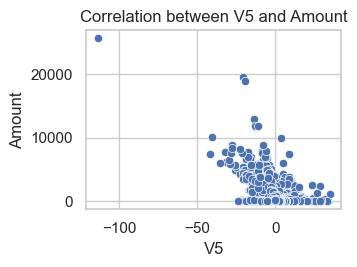

In [59]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='V5', y='Amount', data=df)
plt.title('Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

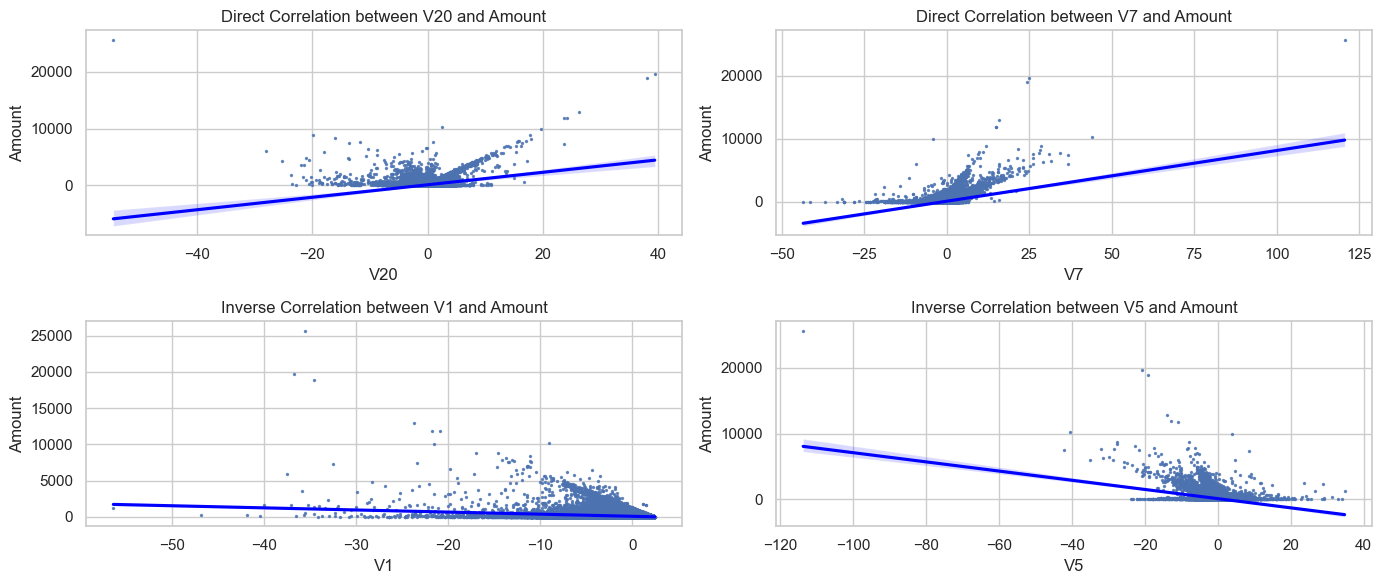

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
sns.regplot(x='V20', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')
plt.subplot(2, 2, 2)
sns.regplot(x='V7', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')
plt.subplot(2, 2, 3)
sns.regplot(x='V1', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')
plt.subplot(2, 2, 4)
sns.regplot(x='V5', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()